In [3]:
import numpy as np
import skfuzzy as fuzz
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train1=pd.read_excel("/home/yash/Work/training/df/UP4years.xlsx","Sheet1")
train1

,Date and Time,UP_DMD
0,2014-01-01 00:00:00,9437.337891
1,2014-01-01 00:15:00,9601.834961
2,2014-01-01 00:30:00,9575.406250
3,2014-01-01 00:45:00,9458.622070
4,2014-01-01 01:00:00,9384.458008
5,2014-01-01 01:15:00,9303.470703
6,2014-01-01 01:30:00,9136.831055
7,2014-01-01 01:45:00,9027.442383
8,2014-01-01 02:00:00,8939.310547
9,2014-01-01 02:15:00,8553.535156


In [5]:
demand_data=np.array(train1.iloc[:,1].values,dtype=float)
demand_data

array([ 9437.33789062,  9601.83496094,  9575.40625   , ...,
       14114.25      , 14364.05664062, 14413.1796875 ])

In [6]:
index=pd.DatetimeIndex(train1.iloc[:,0])
index

DatetimeIndex(['2014-01-01 00:00:00', '2014-01-01 00:15:00',
               '2014-01-01 00:30:00', '2014-01-01 00:45:00',
               '2014-01-01 01:00:00', '2014-01-01 01:15:00',
               '2014-01-01 01:30:00', '2014-01-01 01:45:00',
               '2014-01-01 02:00:00', '2014-01-01 02:15:00',
               ...
               '2017-03-31 21:30:13', '2017-03-31 21:45:00',
               '2017-03-31 22:00:00', '2017-03-31 22:15:00',
               '2017-03-31 22:30:00', '2017-03-31 22:45:00',
               '2017-03-31 23:00:00', '2017-03-31 23:15:00',
               '2017-03-31 23:30:00', '2017-03-31 23:45:00'],
              dtype='datetime64[ns]', name='Date and Time', length=113856, freq=None)

In [7]:
### Creating a temp dataframe and temp series on which we will perform work so as not to affect orig data
cols=['Demand']
temp_df=pd.DataFrame(demand_data,index,cols)
temp_df

,Demand
Date and Time,
2014-01-01 00:00:00,9437.337891
2014-01-01 00:15:00,9601.834961
2014-01-01 00:30:00,9575.406250
2014-01-01 00:45:00,9458.622070
2014-01-01 01:00:00,9384.458008
2014-01-01 01:15:00,9303.470703
2014-01-01 01:30:00,9136.831055
2014-01-01 01:45:00,9027.442383
2014-01-01 02:00:00,8939.310547


In [7]:
hourly = temp_df.resample('H').max()

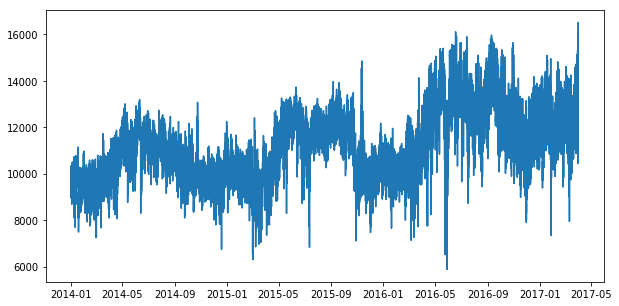

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

df =hourly
ax.plot(df.index,df['Demand'])

data = df['Demand'].iloc[:14232]

In [11]:
hourly.count()

Demand    28373
dtype: int64

In [14]:
hourly=hourly.iloc[:6000,:]
hourly

,Demand
Date and Time,
2014-01-01 00:00:00,9601.834961
2014-01-01 01:00:00,9384.458008
2014-01-01 02:00:00,8981.492188
2014-01-01 03:00:00,9020.666016
2014-01-01 04:00:00,9462.734375
2014-01-01 05:00:00,9670.680664
2014-01-01 06:00:00,9874.875977
2014-01-01 07:00:00,9435.500977
2014-01-01 08:00:00,9801.259766


In [15]:
from pyramid.arima import auto_arima

In [2]:
stepwise_model = auto_arima(hourly, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

NameError: name 'auto_arima' is not defined

In [1]:
stepwise_model.aic()

NameError: name 'stepwise_model' is not defined

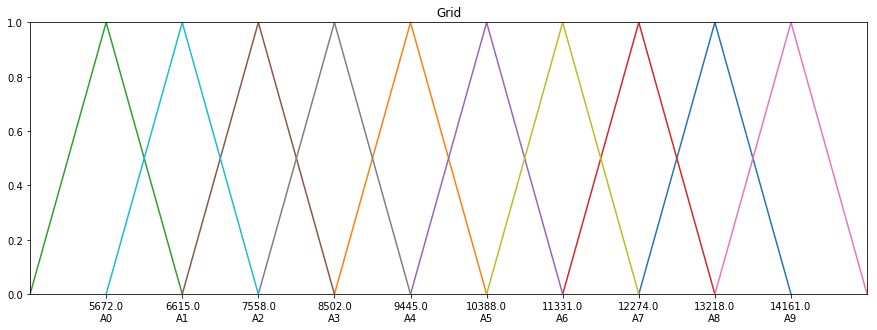

In [48]:
from pyFTS.partitioners import Grid

fs = Grid.GridPartitioner(data=data,npart=10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15,5])

fs.plot(ax)

In [49]:
data

Date and Time
2014-01-01 00:00:00     9601.834961
2014-01-01 01:00:00     9384.458008
2014-01-01 02:00:00     8981.492188
2014-01-01 03:00:00     9020.666016
2014-01-01 04:00:00     9462.734375
2014-01-01 05:00:00     9670.680664
2014-01-01 06:00:00     9874.875977
2014-01-01 07:00:00     9435.500977
2014-01-01 08:00:00     9801.259766
2014-01-01 09:00:00    10066.722656
2014-01-01 10:00:00     9835.670898
2014-01-01 11:00:00    10352.171875
2014-01-01 12:00:00    10013.296875
2014-01-01 13:00:00     9986.023438
2014-01-01 14:00:00     9055.225586
2014-01-01 15:00:00     9329.286133
2014-01-01 16:00:00     9309.962891
2014-01-01 17:00:00     9655.854492
2014-01-01 18:00:00     9959.178711
2014-01-01 19:00:00    10110.145508
2014-01-01 20:00:00     9550.933594
2014-01-01 21:00:00     9576.112305
2014-01-01 22:00:00     9882.793945
2014-01-01 23:00:00     9705.751953
2014-01-02 00:00:00     9361.122070
2014-01-02 01:00:00     9140.356445
2014-01-02 02:00:00     8978.483398
2014-01-02 03:

In [50]:
from pyFTS.models import chen

model = chen.ConventionalFTS("Conventional FTS",partitioner=fs)
model.fit(data)
print(model)

[ 18:33:13] Start training
[ 18:33:13] Starting batch 1
[ 18:33:14] Finish batch 1
[ 18:33:14] Starting batch 2
[ 18:33:14] Finish batch 2
[ 18:33:14] Starting batch 3
[ 18:33:14] Finish batch 3
[ 18:33:14] Starting batch 4
[ 18:33:14] Finish batch 4
[ 18:33:14] Starting batch 5
[ 18:33:14] Finish batch 5
[ 18:33:14] Starting batch 6
[ 18:33:15] Finish batch 6
[ 18:33:15] Starting batch 7
[ 18:33:15] Finish batch 7
[ 18:33:15] Starting batch 8
[ 18:33:15] Finish batch 8
[ 18:33:15] Starting batch 9
[ 18:33:15] Finish batch 9
[ 18:33:15] Starting batch 10
[ 18:33:15] Finish batch 10
[ 18:33:15] Starting batch 11
[ 18:33:15] Finish batch 11
[ 18:33:15] Finish training
Conventional FTS:
A1 -> A1,A2,A4
A2 -> A1,A2,A3,A4
A3 -> A1,A2,A3,A4,A5,A6
A4 -> A2,A3,A4,A5,A6
A5 -> A3,A4,A5,A6,A7
A6 -> A4,A5,A6,A7
A7 -> A5,A6,A7,A8
A8 -> A6,A7,A8,A9
A9 -> A8



In [21]:
from pyFTS.common import Util as U

U.plot_rules(model, size=[15,5] , rules_by_axis=10)

AttributeError: module 'pyFTS.common.Util' has no attribute 'plot_rules'

In [33]:
model.predict([12000])

[11363.415272042415]

In [37]:
X=np.arange()
X

array([    0,     1,     2, ..., 28461, 28462, 28463])

In [51]:
X1=np.array(data.index.values)
X

array(['2014-01-01T00:00:00.000000000', '2014-01-01T01:00:00.000000000',
       '2014-01-01T02:00:00.000000000', ...,
       '2017-03-31T21:00:00.000000000', '2017-03-31T22:00:00.000000000',
       '2017-03-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [52]:
data2=df['Demand'].iloc[14232:]
data2

Date and Time
2015-08-17 00:00:00    12103.322266
2015-08-17 01:00:00    12424.018555
2015-08-17 02:00:00    12155.643555
2015-08-17 03:00:00    11896.458984
2015-08-17 04:00:00    11837.467773
2015-08-17 05:00:00    11965.365234
2015-08-17 06:00:00    11392.339844
2015-08-17 07:00:00    11020.130859
2015-08-17 08:00:00    11113.207031
2015-08-17 09:00:00    11278.945312
2015-08-17 10:00:00    11076.214844
2015-08-17 11:00:00    11348.360352
2015-08-17 12:00:00    11333.818359
2015-08-17 13:00:00    11352.953125
2015-08-17 14:00:00    11384.001953
2015-08-17 15:00:00    11518.625000
2015-08-17 16:00:00    11619.787109
2015-08-17 17:00:00    11206.758789
2015-08-17 18:00:00    11249.822266
2015-08-17 19:00:00    11283.008789
2015-08-17 20:00:00    11314.337891
2015-08-17 21:00:00    11269.773438
2015-08-17 22:00:00    11886.595703
2015-08-17 23:00:00    11581.523438
2015-08-18 00:00:00    11487.988281
2015-08-18 01:00:00    11669.599609
2015-08-18 02:00:00    11835.682617
2015-08-18 03:

In [53]:
X2=np.array(data2.index.values)
X2

array(['2015-08-17T00:00:00.000000000', '2015-08-17T01:00:00.000000000',
       '2015-08-17T02:00:00.000000000', ...,
       '2017-03-31T21:00:00.000000000', '2017-03-31T22:00:00.000000000',
       '2017-03-31T23:00:00.000000000'], dtype='datetime64[ns]')

In [54]:
forecasts = model.predict(data2)
#forecasts.insert(0,None)
forecasts

[11802.825412597655,
 11802.825412597655,
 11802.825412597655,
 11802.825412597655,
 11802.825412597655,
 11802.825412597655,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 11802.825412597655,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 11802.825412597655,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 11802.825412597655,
 11802.825412597655,
 11802.825412597655,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 10859.633259277341,
 11802.825412597655,
 11802.825412

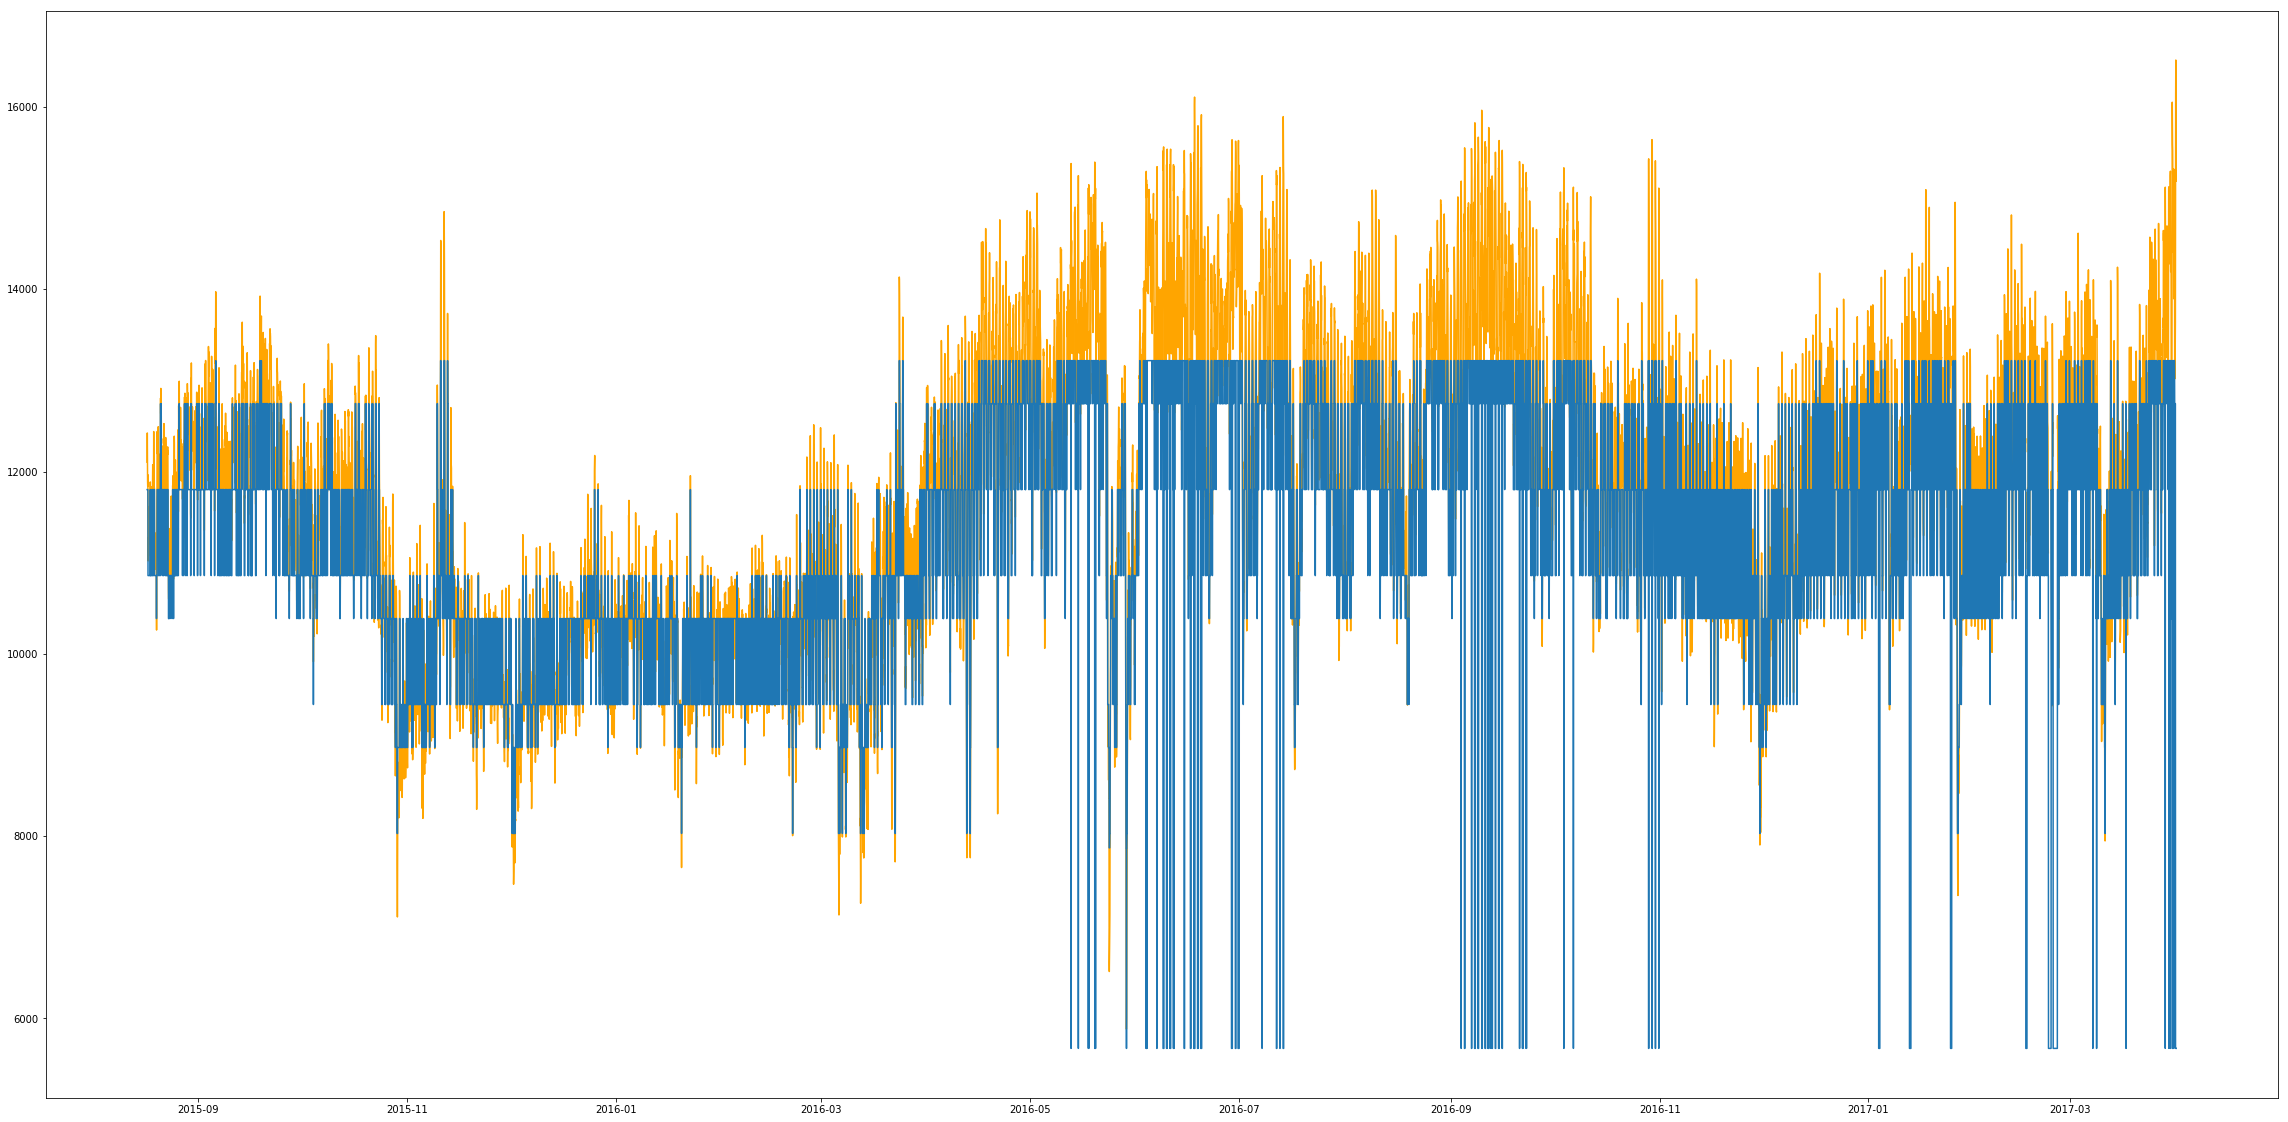

In [55]:

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[40,20])





ax.plot(X2,data2,c = "orange",label="Original data")
ax.plot(X2,forecasts, label="Forecasts")

#legend(handles=[orig, pred])